In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind,f_oneway


In [ ]:
data = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')
data.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
data.shape

(10886, 12)

Let's Convert categorical attributes

In [ ]:
df = data
df['season'] = df['season'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')

In [ ]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


##Univariate Analysis:

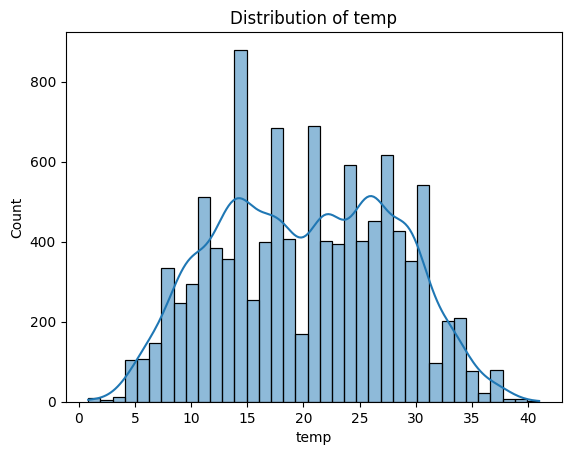

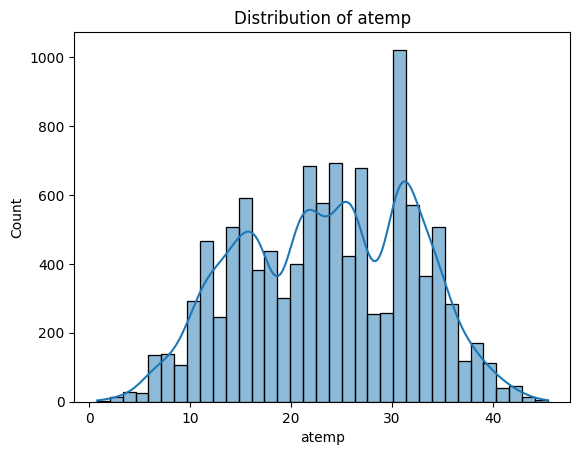

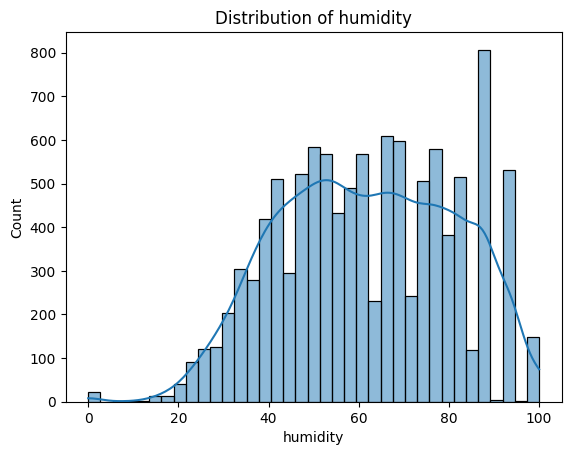

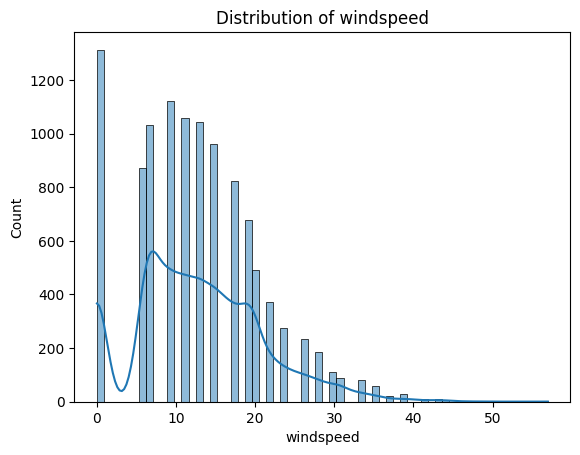

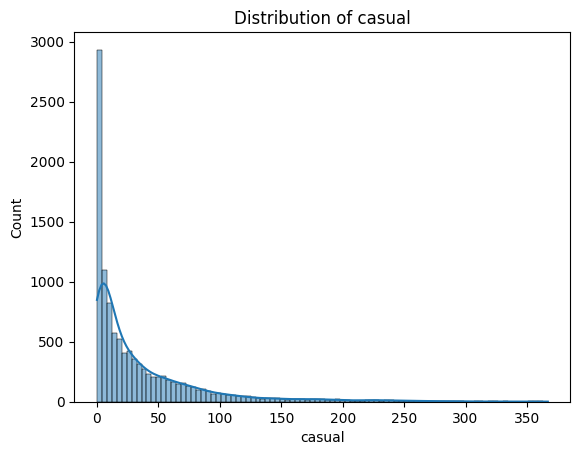

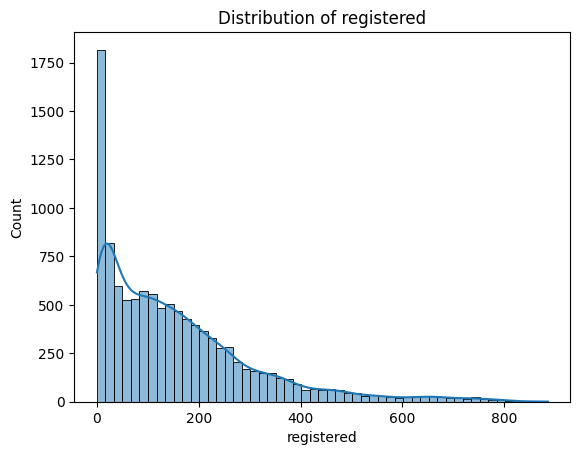

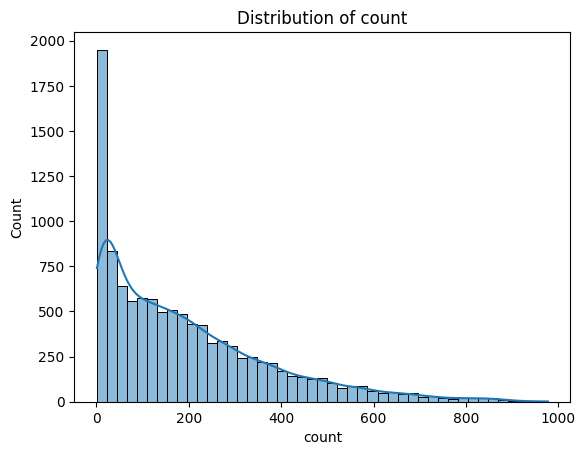

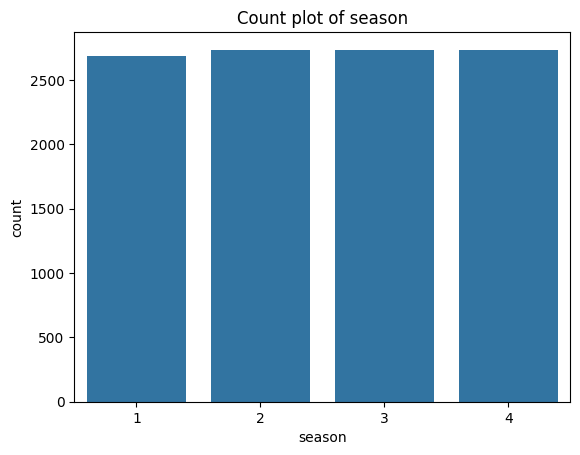

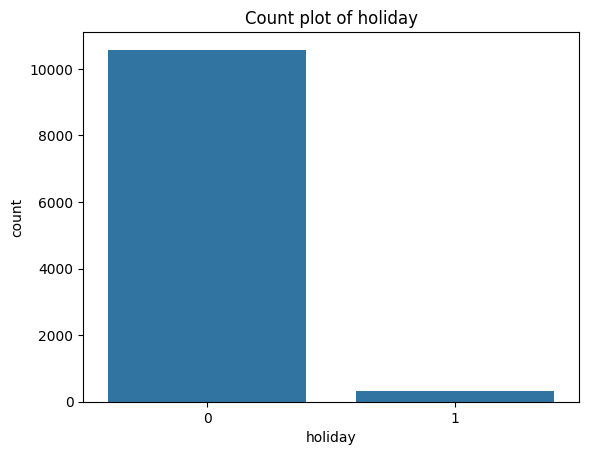

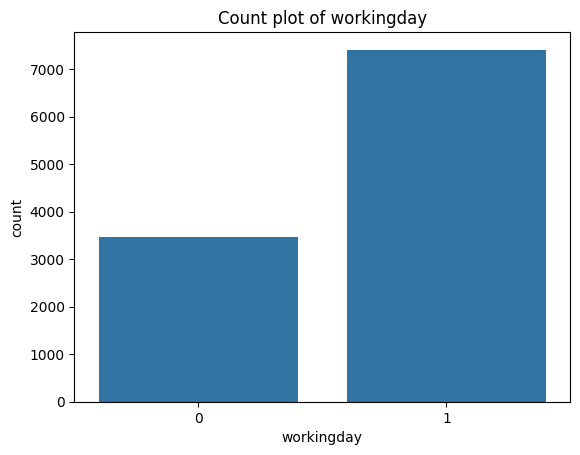

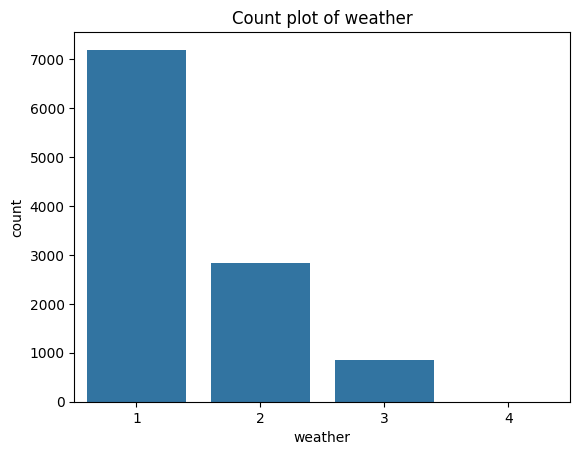

In [ ]:
continuous_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
categorical_vars = ['season', 'holiday', 'workingday', 'weather']

# Distribution plots for continuous variables
for var in continuous_vars:
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

# Count plots for categorical variables
for var in categorical_vars:
    sns.countplot(x=var, data=df)
    plt.title(f'Count plot of {var}')
    plt.show()


In [ ]:
def remove_outliers_iqr(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame

    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df


In [ ]:
for column in continuous_vars:
    df = remove_outliers_iqr(df, column)

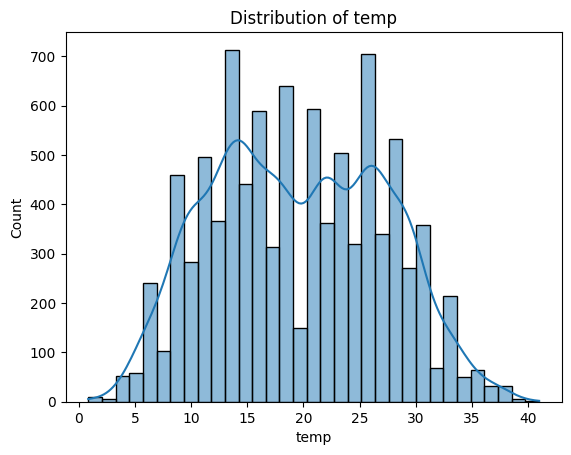

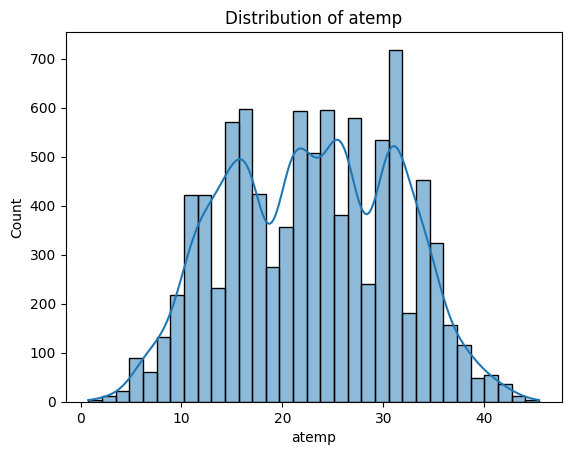

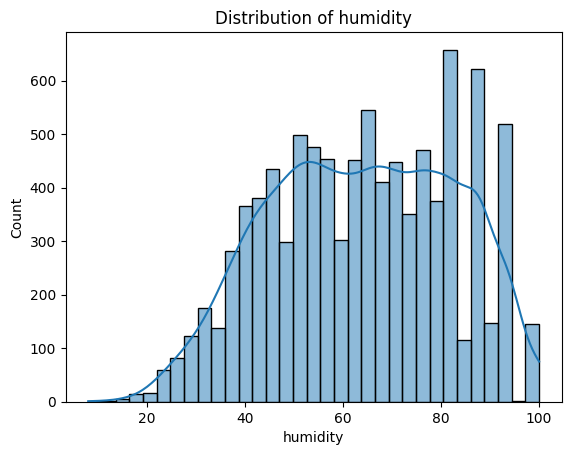

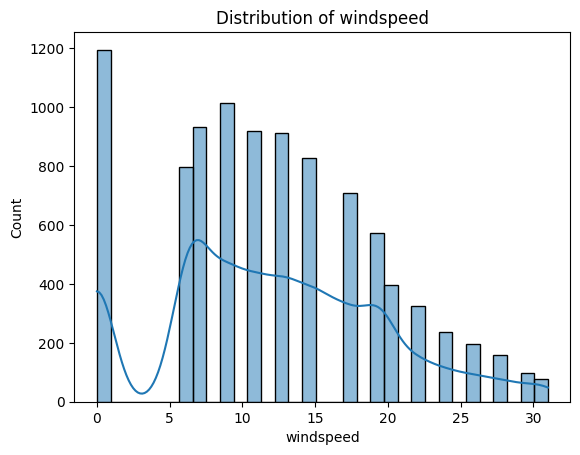

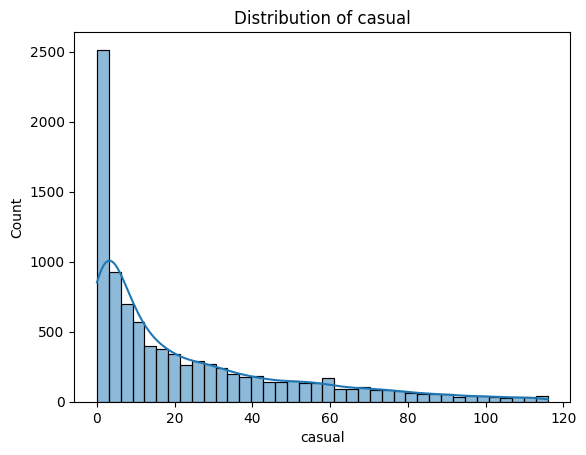

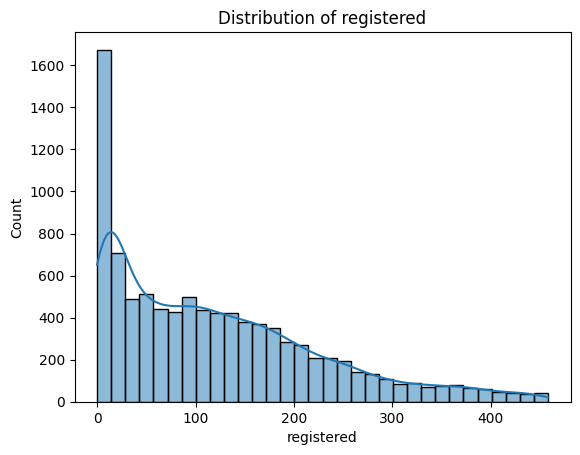

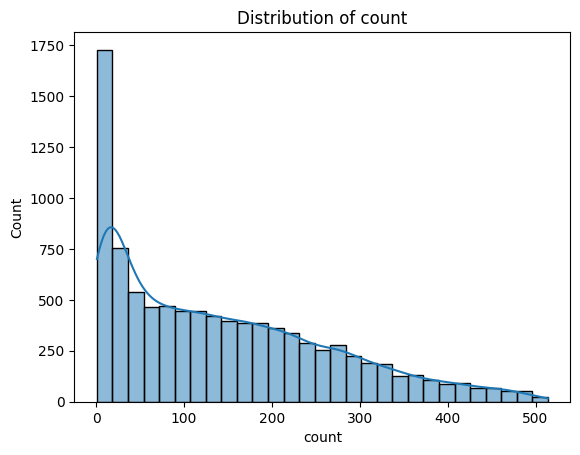

In [ ]:

# Distribution plots for continuous variables
for var in continuous_vars:
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

##Bivariate Analysis:

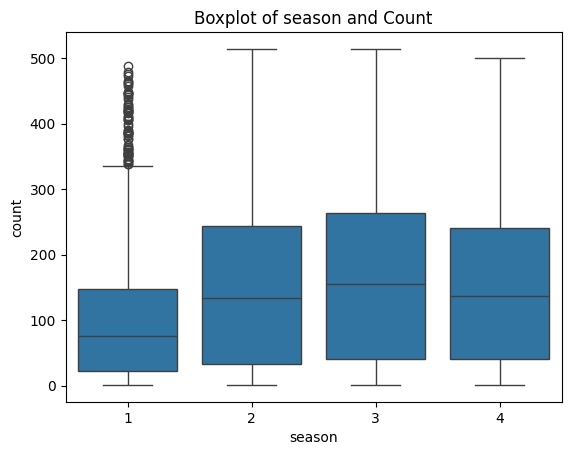

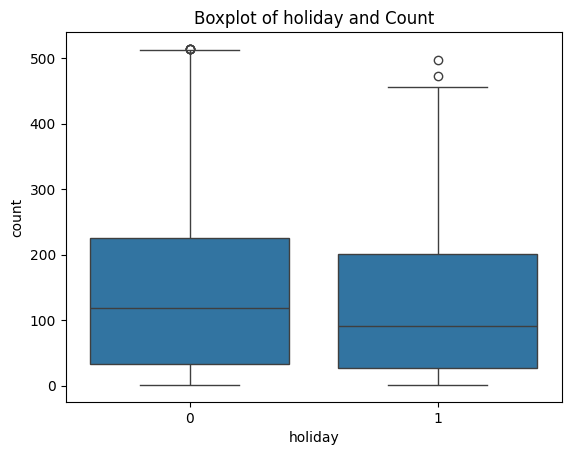

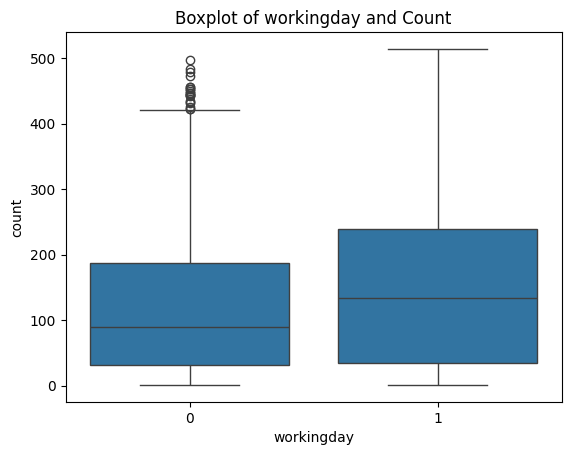

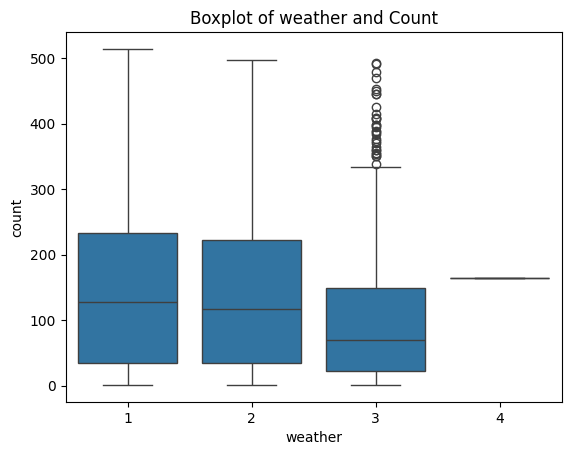

In [ ]:
for var in categorical_vars :
  sns.boxplot(x=var, y='count', data=df)
  plt.title(f'Boxplot of {var} and Count')
  plt.show()



##**Step 2: Hypothesis Testing**

#2 Sample T-Test:

Null Hypothesis (H0): Working Day has no effect on the number of electric cycles rented.\
Alternate Hypothesis (H1): Working Day has an effect on the number of electric cycles rented\
Significance level at 5%

In [ ]:
working_day_count = df[df['workingday'] == 1]['count']
non_working_day_count = df[df['workingday'] == 0]['count']

t_stat, p_val = ttest_ind(working_day_count, non_working_day_count)

print(f'T-Statistic: {t_stat}, P-Value: {p_val}')

alpha = 0.05

if p_val < alpha :
  print( 'Reject Null Hypothesis , Working Day has an effect on the number of electric cycles rented ')
else:
  print("Fail to Reject Null Hypothesis  , Working Day has no effect on the number of electric cycles rented ")

T-Statistic: 12.084616332054733, P-Value: 2.2552148137228035e-33
Reject Null Hypothesis , Working Day has an effect on the number of electric cycles rented 


## one way Annova Test

In [ ]:
from scipy.stats import f_oneway,levene,kruskal,shapiro

season1 = df[df['season'] == 1]['count']

season2 = df[df['season'] == 2]['count']

season3 = df[df['season'] == 3]['count']

season4 = df[df['season'] == 4]['count']

stats1,pvalue1 = shapiro(season1)
stats2,pvalue2 = shapiro(season2)
stats3,pvalue3 = shapiro(season3)
stats4,pvalue4 = shapiro(season4)

alpha = 0.05

print("not normally distributed" if pvalue1 <= alpha else "normally distributed")
print("not normally distributed" if pvalue2 <= alpha else "normally distributed")
print("not normally distributed" if pvalue3 <= alpha else "normally distributed")
print("not normally distributed" if pvalue4 <= alpha else "normally distributed")



# H0: Variances are equal
# Ha: Variances are not equal

# Levene test
statistic, pvalue_levene = levene(season1, season2, season3,season4 )
print('Levene test p-value:',pvalue_levene)

if pvalue_levene < alpha:
 print("Variances are not equal")
else:
 print("Variances are equal")

not normally distributed
not normally distributed
not normally distributed
not normally distributed
Levene test p-value: 1.4156739715299946e-85
Variances are not equal



We can see in the above output our Seasons rent counts are not normally distributed so we cannot go with doing annova test .  we will need to perform Kruskal-Wallis test in order to make conclusions.

In [ ]:

from scipy.stats import kruskal
# Null Hypothesis (H0): The medians of the seasons are the same for all three algorithms.
# Alternative Hypothesis (H1): At least one of the medians of the seasons is different among the four .

stat, p_value = kruskal(season1, season2, season3,season4)

print("test statistic:",stat)
print("p_value:",p_value)

if p_value < 0.05:
   print("Reject H0")
   print("At least one of the medians of the rented counts is different among the four seasons")
else:
   print("Fail to reject H0")
   print("The medians of the rented counts are the same for all four seasons .")

test statistic: 402.42037461467095
p_value: 6.62035386503286e-87
Reject H0
At least one of the medians of the rented counts is different among the four seasons


**Let's try Two Way Annova for Season and Holiday**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('count ~ C(season) * C(holiday)',data = df).fit()

sm.stats.anova_lm(model,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(season),3.0,6.453570e+06,2.151190e+06,148.352600,6.341897e-94
C(holiday),1.0,5.592706e+04,5.592706e+04,3.856900,4.957134e-02
C(season):C(holiday),3.0,2.683250e+05,8.944166e+04,6.168169,3.489435e-04
Residual,9356.0,1.356669e+08,1.450052e+04,NaN,NaN


At 5% significant level (0.05)
p value is high on Holiday and Interaction so we fail to reject null
there is no significant difference acrros them
But P value is low for seasons so we reject null and we conclude there is a significant difference in seasons

Final: there is a significant difference in   seasons

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('count ~ C(weather) * C(season)',data = df).fit()

sm.stats.anova_lm(model,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(weather),3.0,1.682686e+06,5.608952e+05,39.114427,4.125070e-25
C(season),3.0,6.504401e+06,2.168134e+06,151.196354,1.095670e-95
C(weather):C(season),9.0,1.739865e+05,1.933184e+04,1.348119,2.060932e-01
Residual,9351.0,1.340920e+08,1.433985e+04,NaN,NaN


At 5% significant level (0.05)

 P value is low for seasons,weather and their interactions so we reject null and we conclude there is a significant difference in seasons

Final: there is a significant difference in seasons and weather

##Chi-Square Test



In [ ]:
from scipy.stats import chi2_contingency
# Create contingency table

contingency_table = pd.crosstab(df['season'], df['weather'])
print('Contingency Table:')
print(contingency_table)

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
print(f'\nChi-square Statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of Freedom: {dof}')
print('Expected Frequencies:')
print(expected)

# Interpret the results
alpha = 0.05  # significance level
if p < alpha:
    print("\nReject the null hypothesis: Weather is dependent on the season.")
else:
    print("\nFail to reject the null hypothesis: Weather is independent of the season.")


Contingency Table:
weather     1    2    3  4
season                    
1        1583  680  184  1
2        1436  610  203  0
3        1557  500  173  0
4        1483  743  211  0

Chi-square Statistic: 50.87276261778956
p-value: 7.37899576712981e-08
Degrees of Freedom: 9
Expected Frequencies:
[[1.58398462e+03 6.62193934e+02 2.01560017e+02 2.61426741e-01]
 [1.45522117e+03 6.08363627e+02 1.85175032e+02 2.40175139e-01]
 [1.44292717e+03 6.03224050e+02 1.83610636e+02 2.38146091e-01]
 [1.57686704e+03 6.59218390e+02 2.00654314e+02 2.60252029e-01]]

Reject the null hypothesis: Weather is dependent on the season.
